<a href="https://colab.research.google.com/github/Azdirazi/XGB_Stroke_Prediction/blob/main/Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
%matplotlib inline

#Load DataSet
from google.colab import  drive
drive.mount('/content/drive')
data= pd.read_csv("/content/drive/MyDrive/Stroke Dataset.csv");
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [208]:
#Cek Jumlah Data dan Kolomnya
data.shape

(5110, 12)

### **STEP EDA**

In [209]:
#cek data kosong
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [95]:
#Handling missing value dengan mean data
import math
data['bmi'].fillna(math.floor(data['bmi'].mean()),inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [210]:
data[['gender','id']].groupby(['gender']).count()

,id
gender,
Female,2994
Male,2115
Other,1


In [211]:
#Membuang data Other
data=data[data['gender']!='Other']
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [212]:
#Membuang coloum yg tidak di perlukan
data=data.drop(['id','Residence_type'],axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,166.29,25.6,formerly smoked,0


<ipython-input-101-9ba64f83232b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = data.corr()


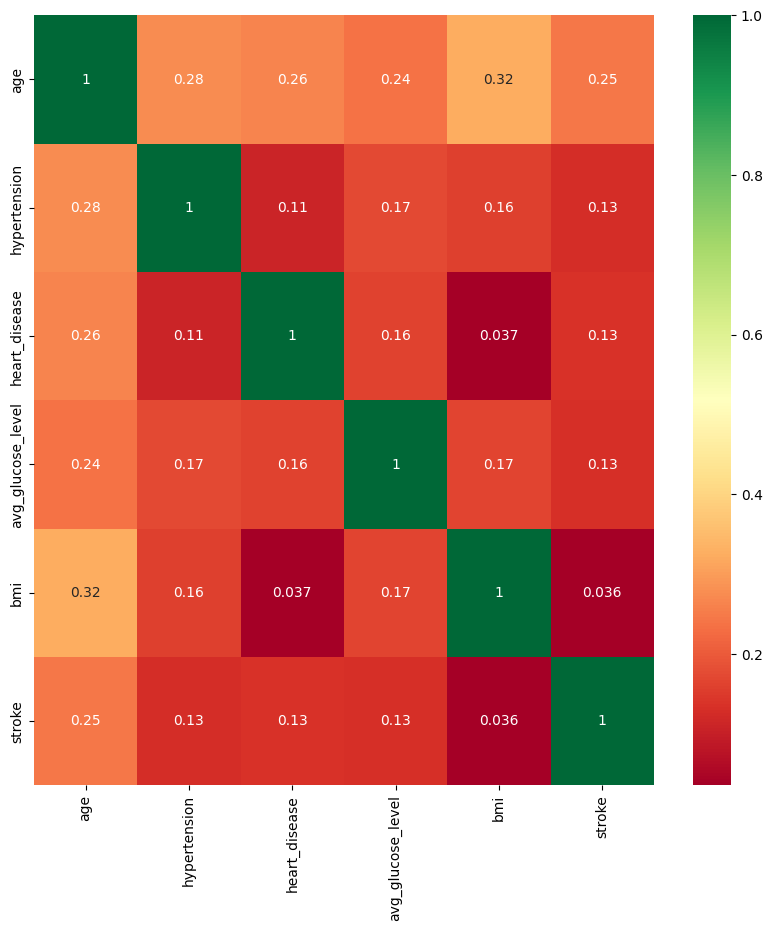

In [101]:
#Korelasi Menggunakan HeatMap
import seaborn as sns

korelasi = data.corr()
feature = korelasi.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[feature].corr(),annot=True,cmap="RdYlGn")

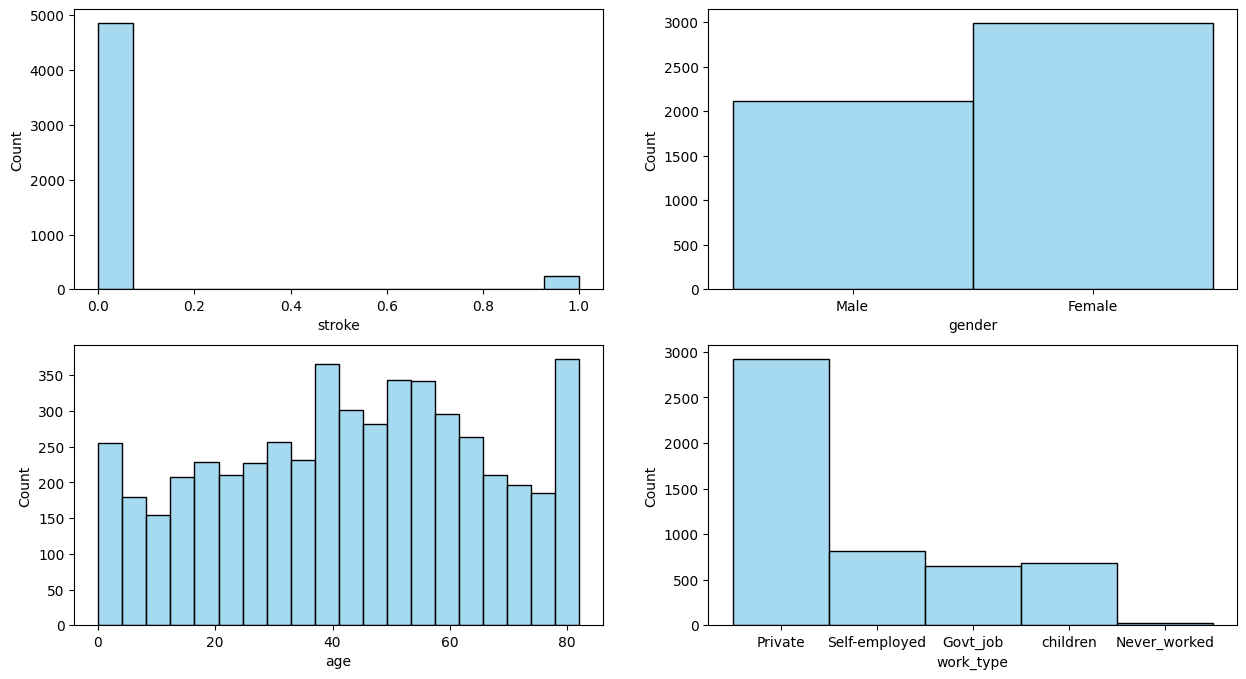

In [217]:
#Visualisasi Data
fig,axes= plt.subplots(2,2, figsize=(15,8))

sns.histplot(data=data,x='stroke',ax=axes[0,0],color='skyblue')
sns.histplot(data=data,x='work_type',ax=axes[1,1],color='skyblue')
sns.histplot(data=data,x='gender',ax=axes[0,1],color='skyblue')
sns.histplot(data=data,x='age',ax=axes[1,0],color='skyblue')
plt.show()

In [103]:
# Mengecek apakah ada nilai nol pada colom umur
print('Banyak Baris Nilai nol untuk Age:{0}'.format(len(data.loc[data['age']==0])))

Banyak Baris Nilai nol untuk Age:0


In [104]:
# Menunjukan Korelasi di dalam tabel
data.corr()

<ipython-input-104-97e25b75af9a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.323995,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.158008,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.036628,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.166792,0.131991
bmi,0.323995,0.158008,0.036628,0.166792,1.000000,0.035717
stroke,0.245239,0.127891,0.134905,0.131991,0.035717,1.000000


In [105]:
# Menunjukan Stastika
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.859366,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.700200,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [114]:
#Transformasi data
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['gender']=encode.fit_transform(data['gender'].values)
data['work_type']=encode.fit_transform(data['work_type'].values)
data['ever_married']=encode.fit_transform(data['ever_married'].values)
data['smoking_status']=encode.fit_transform(data['smoking_status'].values)

In [115]:
data

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,202.21,28.0,2,1
2,1,80.0,0,1,1,105.92,32.5,2,1
3,0,49.0,0,0,1,171.23,34.4,3,1
4,0,79.0,1,0,1,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.0,2,0
5106,0,81.0,0,0,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,82.99,30.6,2,0
5108,1,51.0,0,0,1,166.29,25.6,1,0


In [116]:
#Checking Skewness
stroke_true_count = len(data.loc[data['stroke']==True])
stroke_false_count =len(data.loc[data['stroke']==0])

In [117]:
#View
(stroke_true_count,stroke_false_count)

(249, 4860)

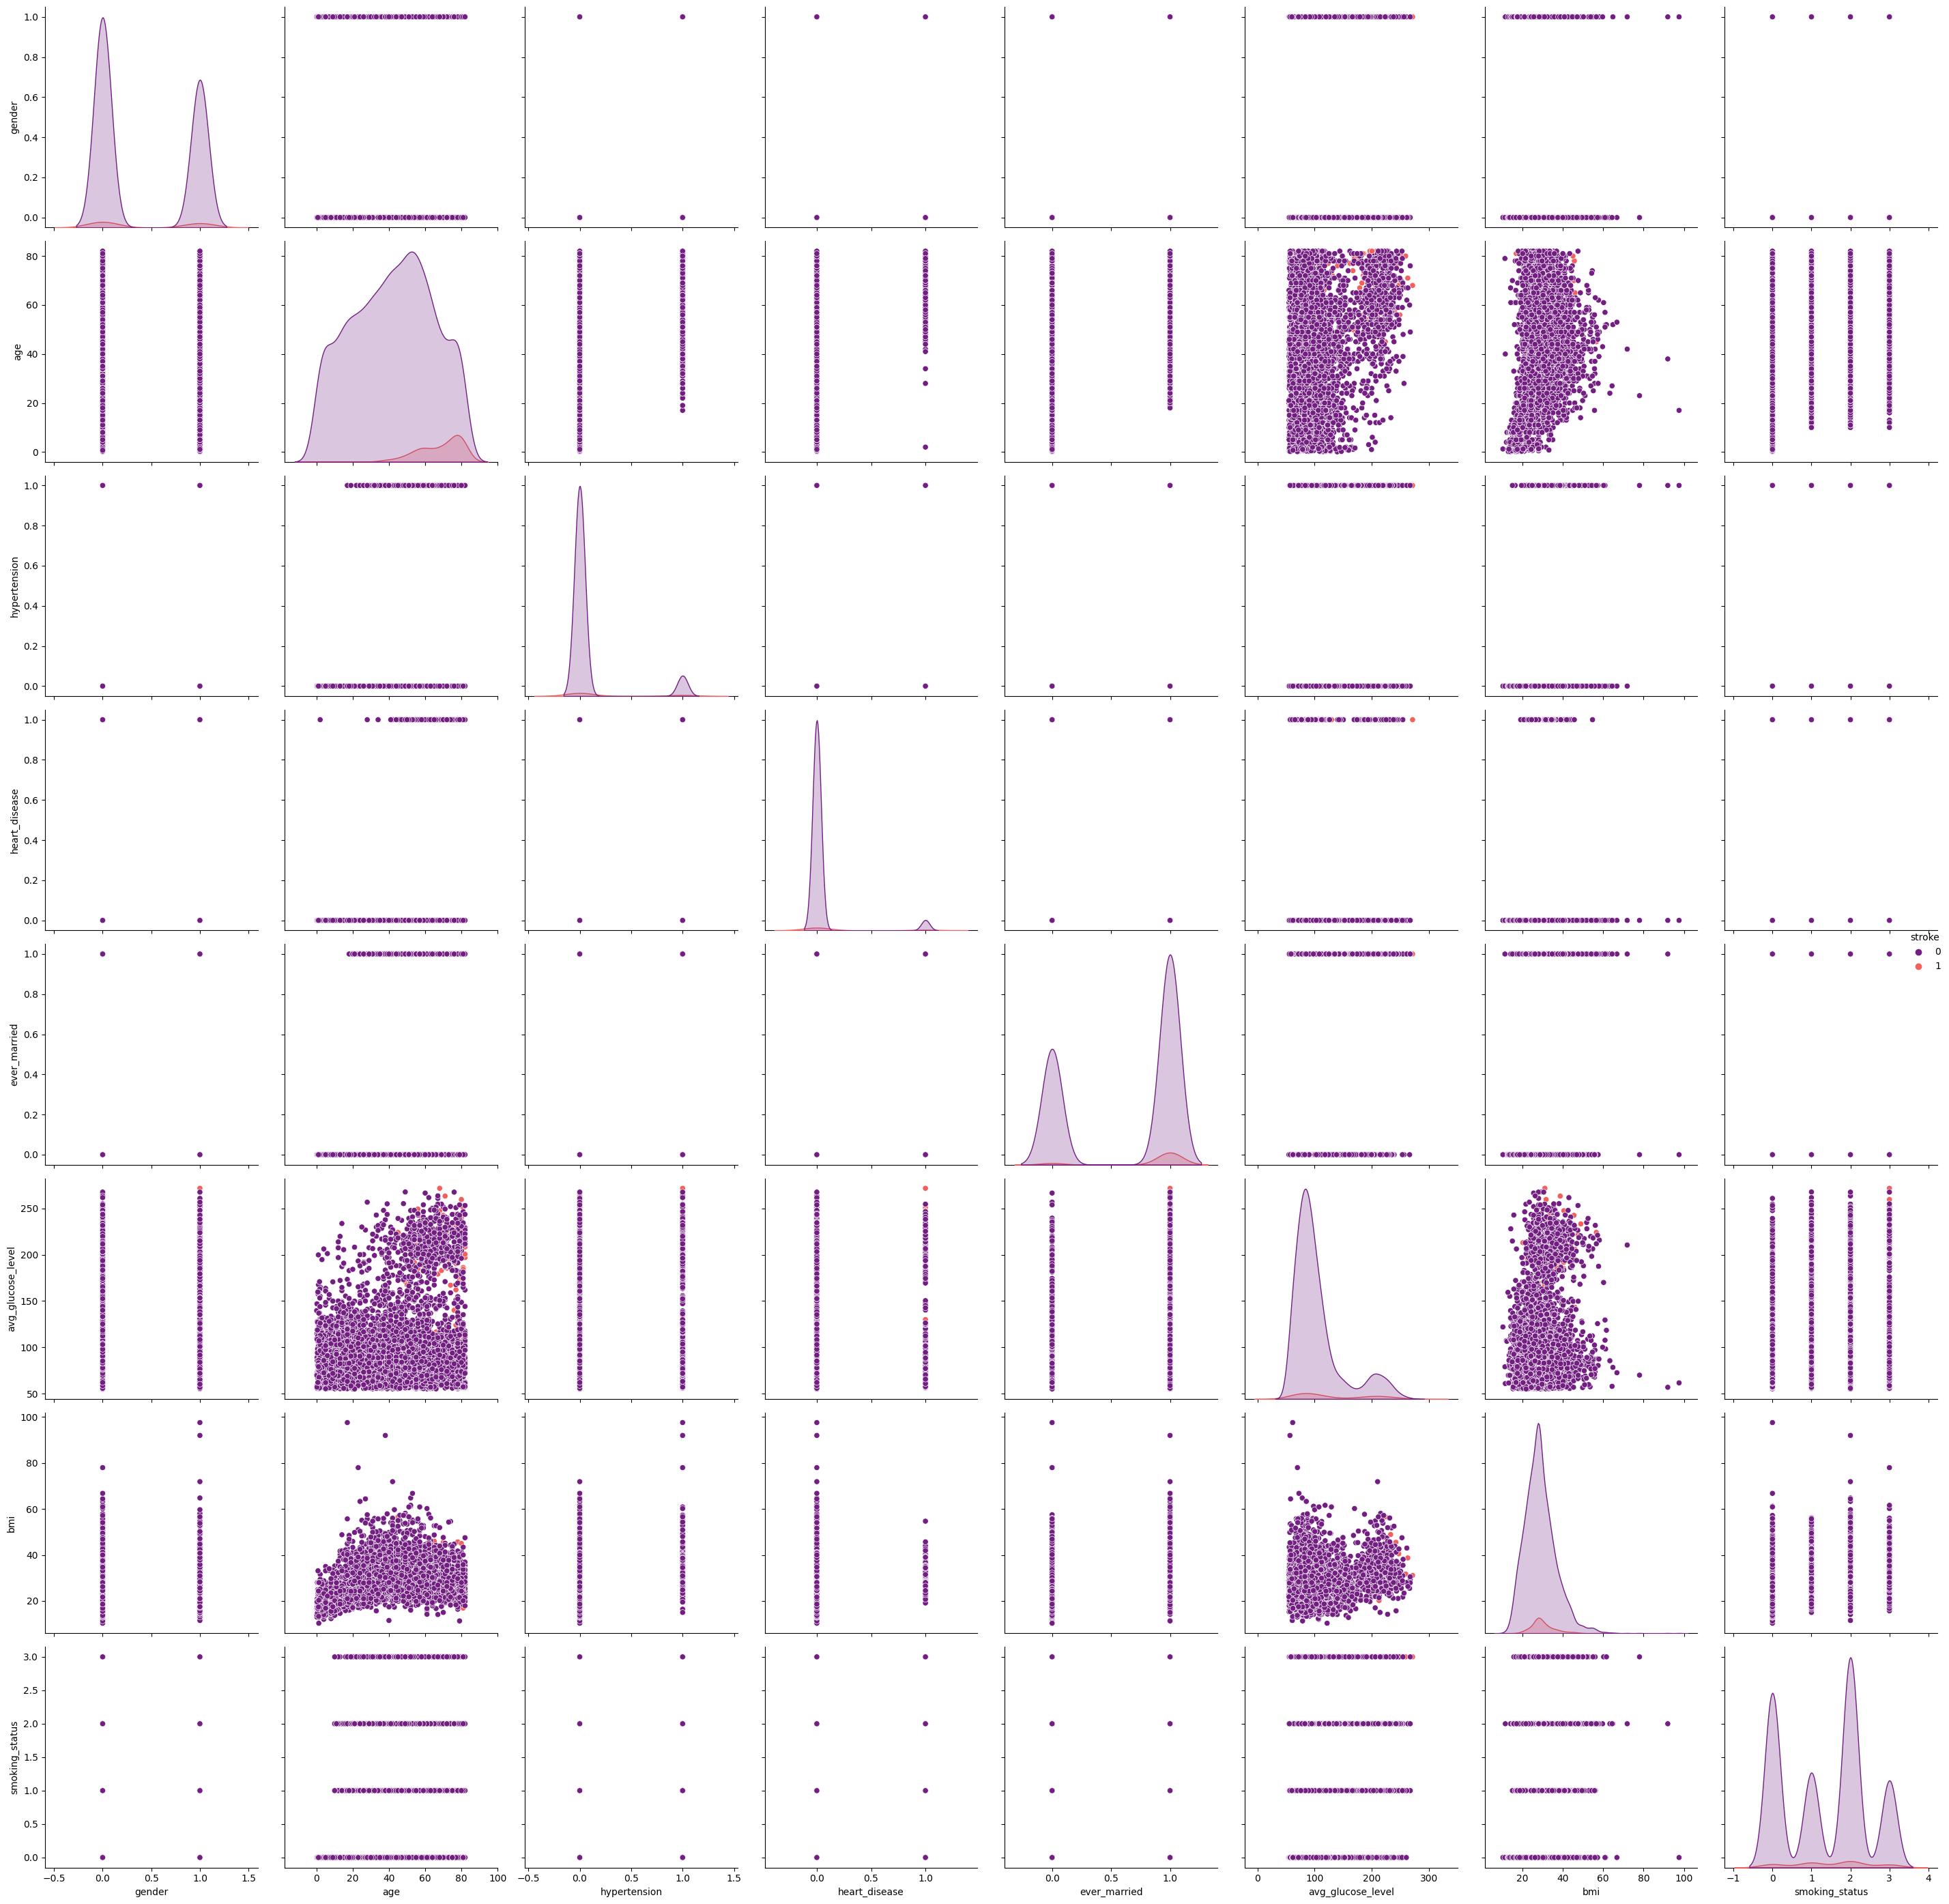

In [118]:
#Make PairPlot
sns.pairplot(data,hue="stroke",palette='magma',height=3.5)
plt.tight_layout()

In [186]:
#SMOTE
#Dilakukan SMOTE untuk menangani data imbalance
from imblearn.over_sampling import SMOTE

X  = data.drop('stroke',axis=1)
y = data['stroke']
sm= SMOTE(random_state=30)
#sampling SMOTE
X_sm,y_sm= sm.fit_resample (X,y)


# **Markdown Apply Model**

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, train_size=0.3  , random_state=42)

In [187]:
print(Counter(y_test))
print(Counter(y_train))

Counter({0: 3419, 1: 3385})
Counter({1: 1475, 0: 1441})


# **Training MODEL**

In [188]:
from xgboost import XGBClassifier

# buat XGBoostClassifier
XGB_model = XGBClassifier()

In [189]:
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [201]:
#Prediction
xgb_prediction=XGB_model.predict(X_test)

In [204]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,xgb_prediction))

[[2987  432]
 [ 195 3190]]


In [205]:
print(classification_report(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91      3419
           1       0.88      0.94      0.91      3385

    accuracy                           0.91      6804
   macro avg       0.91      0.91      0.91      6804
weighted avg       0.91      0.91      0.91      6804



# **Save Model**

In [193]:
import pickle

pickle.dump(XGB_model,open('XGB.pkl','wb'))